In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('HW.csv')

In [4]:
data.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
data=data.drop('Index',axis=1)

In [6]:
data.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [7]:
data.shape

(25000, 2)

In [8]:
data.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


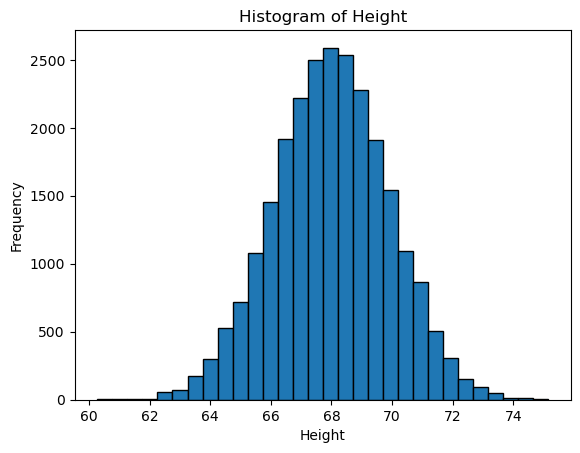

In [9]:
import matplotlib.pyplot as plt


plt.hist(data['Height(Inches)'], bins=30, edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

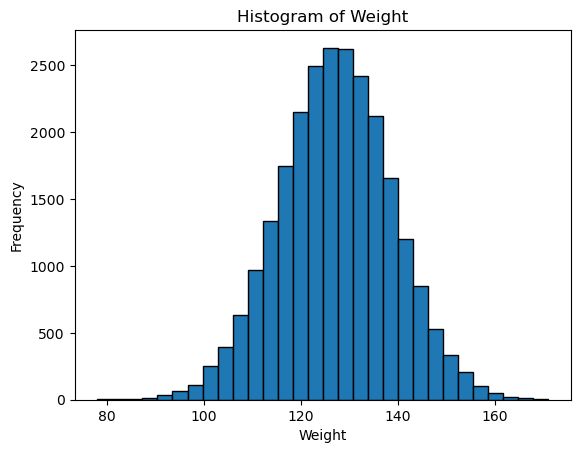

In [10]:

plt.hist(data['Weight(Pounds)'], bins=30, edgecolor='black')
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [11]:
data.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
data_scaled=scaler.fit_transform(data)

In [15]:
data_scaled=pd.DataFrame(data_scaled)

In [16]:
data_scaled

,0,1
0,0.370095,0.376472
1,0.755447,0.629351
2,0.613158,0.807370
3,0.533683,0.692295
4,0.504856,0.713410
...,...,...
24995,0.620110,0.430705
24996,0.287063,0.453975
24997,0.297167,0.433226
24998,0.487468,0.583940


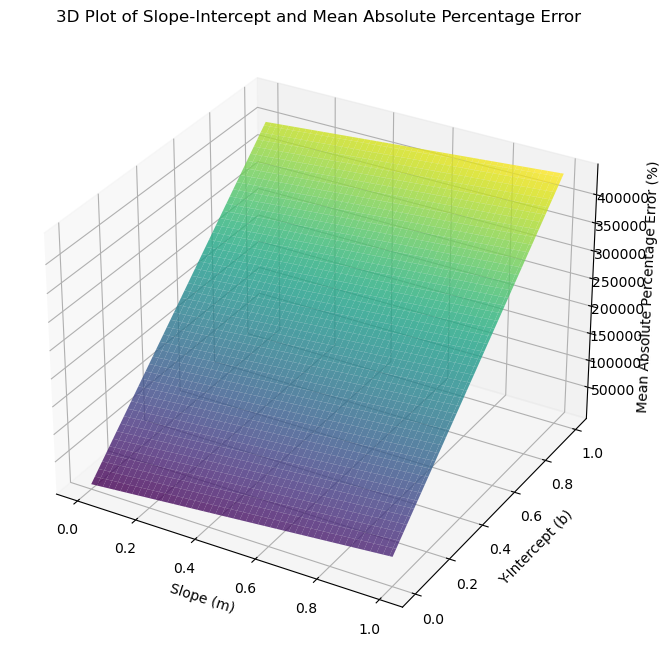

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
x_data = np.array(data_scaled[0])
y_data = np.array(data_scaled[1])

# Function to calculate absolute percentage error
def absolute_percentage_error(m, b, x, y):
    predictions = m * x + b
    absolute_percentage_error = np.mean(np.abs((y - predictions) / np.maximum(np.abs(y), 1e-8))) * 100  # Avoid division by zero
    return absolute_percentage_error

# Generate 3D data for slope (m) and y-intercept (b) based on data range
m_values = np.linspace(np.min(x_data), np.max(x_data), 100)
b_values = np.linspace(np.min(y_data), np.max(y_data), 100)
m_values, b_values = np.meshgrid(m_values, b_values)

# Calculate absolute percentage error for each combination of m and b
percentage_error_values = np.zeros_like(m_values)

for i in range(m_values.shape[0]):
    for j in range(m_values.shape[1]):
        percentage_error_values[i, j] = absolute_percentage_error(m_values[i, j], b_values[i, j], x_data, y_data)

# Plot 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(m_values, b_values, percentage_error_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Y-Intercept (b)')
ax.set_zlabel('Mean Absolute Percentage Error (%)')
ax.set_title('3D Plot of Slope-Intercept and Mean Absolute Percentage Error')

plt.show()


In [19]:
import tensorflow as tf
model_ADAM = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [20]:
model_ADAM.compile(optimizer='adam', loss='mean_absolute_percentage_error')

In [21]:
model_ADAM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history_ADAM= model_ADAM.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20

782/782 [==============================] - 3s 2ms/step - loss: 14405.9395
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 13566.5332
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 12715.2637
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 11638.1670
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 10549.6396
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 9535.4844
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 8484.9277
Epoch 8/20
782/782 [==============================] - 2s 2ms/step - loss: 7507.0259
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 6612.5293
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 5541.8306
Epoch 11/20
782/782 [==============================] - 2s 2ms/step - loss: 4510.3330
Epoch 12/20
782/782 [==============================] - 2s 2ms/step -

In [23]:
weights, bias = model_ADAM.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[-0.02308302]]
Trained Bias: [0.01510308]


In [24]:
model_rmsprop = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [25]:
model_rmsprop.compile(optimizer='rmsprop', loss='mean_absolute_percentage_error')

In [26]:
history_rmsprop= model_rmsprop.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20
782/782 [==============================] - 2s 2ms/step - loss: 13651.4531
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 15778.3701
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 13683.5625
Epoch 4/20
782/782 [==============================] - 2s 3ms/step - loss: 12737.3291
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 12149.9717
Epoch 6/20
782/782 [==============================] - 2s 3ms/step - loss: 12044.5479
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 11823.5010
Epoch 8/20
782/782 [==============================] - 2s 3ms/step - loss: 11798.5127
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 11727.6016
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 11611.5225
Epoch 11/20
782/782 [==============================] - 2s 2ms/step - loss: 11518.6328
Epoch 12/20
782/782 [==============================] - 2s 3ms/s

In [27]:
weights, bias = model_rmsprop.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[0.5243397]]
Trained Bias: [0.22167878]


In [28]:
model_SGD = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [29]:
model_SGD.compile(optimizer='SGD', loss='mean_absolute_percentage_error')

In [30]:
history_SGD= model_SGD.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20
782/782 [==============================] - 2s 2ms/step - loss: 32335242.0000
Epoch 2/20
782/782 [==============================] - 2s 3ms/step - loss: 12621029376.0000
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 19064638.0000
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 12634372096.0000
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 19295600.0000
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 12633956352.0000
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 66572260.0000
Epoch 8/20
782/782 [==============================] - 2s 2ms/step - loss: 12586887168.0000
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 52119708.0000
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 12600825856.0000
Epoch 11/20
782/782 [==============================] - 2s 2ms/step - loss: 53211396.0000
Epoch 12/20
782

In [31]:
weights, bias = model_SGD.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[2872.628]]
Trained Bias: [5757.809]


In [32]:
model_Adagrad = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [33]:
model_Adagrad.compile(optimizer='Adagrad', loss='mean_absolute_percentage_error')

In [34]:
history_Adagrad= model_Adagrad.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20
782/782 [==============================] - 3s 3ms/step - loss: 4992.3945
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 4947.6816
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 4916.0806
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 4890.2451
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 4867.9180
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 4847.9219
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 4829.6514
Epoch 8/20
782/782 [==============================] - 2s 2ms/step - loss: 4812.7476
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 4796.9341
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 4782.0361
Epoch 11/20
782/782 [==============================] - 2s 3ms/step - loss: 4767.8867
Epoch 12/20
782/782 [==============================] - 2s 3ms/step - loss:

In [35]:
weights, bias = model_Adagrad.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[1.2190483]]
Trained Bias: [-0.01945931]


In [36]:
model_Adadelta = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [37]:
model_Adadelta.compile(optimizer='Adadelta', loss='mean_absolute_percentage_error')

In [38]:
history_Adadelta= model_Adadelta.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20
782/782 [==============================] - 3s 2ms/step - loss: 6374.1602
Epoch 2/20
782/782 [==============================] - 2s 3ms/step - loss: 6372.5498
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 6365.3164
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 6333.8911
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 6323.2837
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 6305.7905
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 6279.2407
Epoch 8/20
782/782 [==============================] - 2s 2ms/step - loss: 6267.9663
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 6225.1055
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 6224.3672
Epoch 11/20
782/782 [==============================] - 2s 3ms/step - loss: 6207.9551
Epoch 12/20
782/782 [==============================] - 2s 2ms/step - loss:

In [39]:
weights, bias = model_Adadelta.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[-1.3838673]]
Trained Bias: [0.00859694]


In [40]:
training_histories = [history_ADAM,history_rmsprop,history_SGD,history_Adagrad,history_Adadelta]

In [49]:
optimizers_list=['ADAM','rmsprop','SGD','Adagrad','Adadelta']


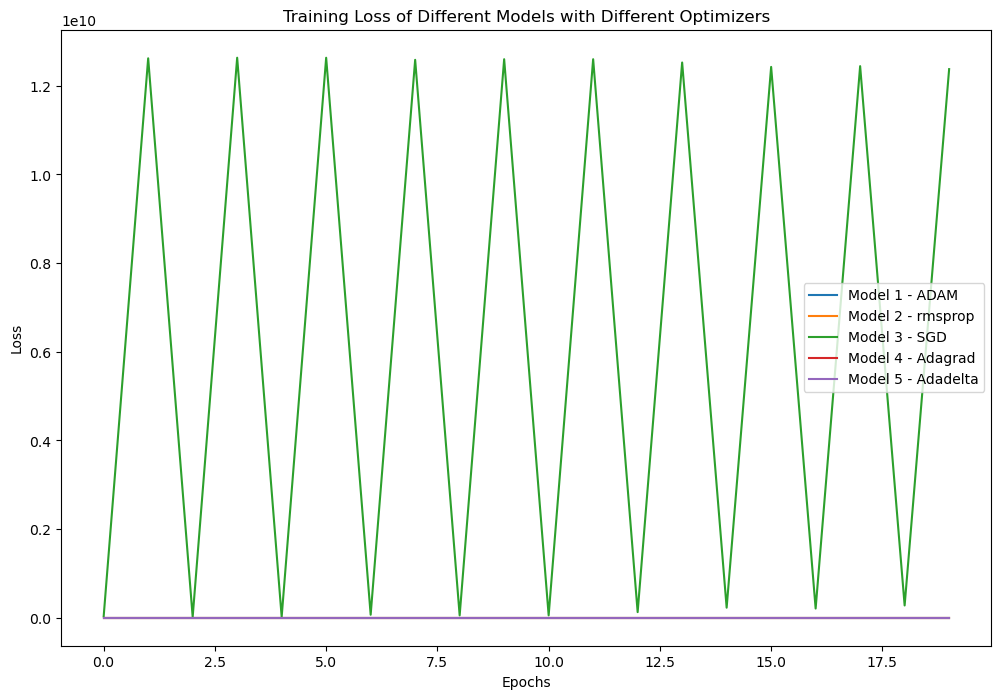

In [50]:
plt.figure(figsize=(12, 8))
for i, history in enumerate(training_histories):
    plt.plot(history.history['loss'], label=f'Model {i + 1} - {optimizers_list[i]}')

plt.title('Training Loss of Different Models with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
training_histories = [history_ADAM,history_rmsprop,history_Adagrad]

In [54]:
optimizers_list=['ADAM','rmsprop','Adagrad']

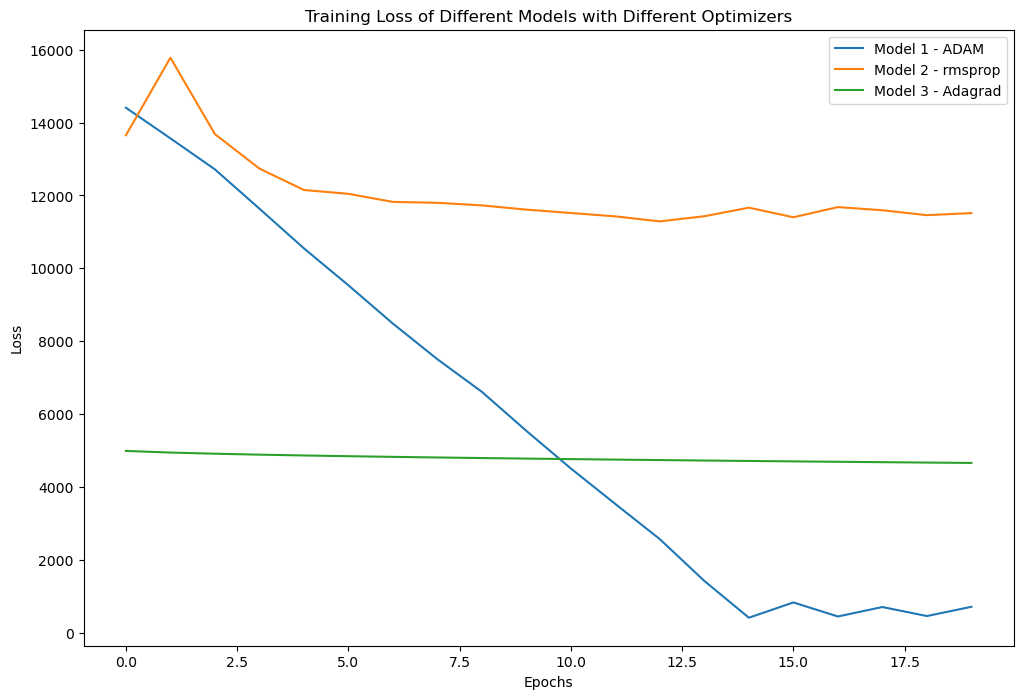

In [55]:
plt.figure(figsize=(12, 8))
for i, history in enumerate(training_histories):
    plt.plot(history.history['loss'], label=f'Model {i + 1} - {optimizers_list[i]}')

plt.title('Training Loss of Different Models with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()